In [ ]:
from zipfile import ZipFile
import os
file_name = "Electric_Vehicle_Population_Size_History_By_County_.csv.zip"
with ZipFile(file_name, 'r') as zip_ref:
    zip_ref.extractall("dataset")
print("Isi folder dataset:")
print(os.listdir("dataset"))

Isi folder dataset:
['Electric_Vehicle_Population_Size_History_By_County_.csv']


In [ ]:
import pandas as pd
df = pd.read_csv("dataset/Electric_Vehicle_Population_Size_History_By_County_.csv")
df.head()

,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
0,September 30 2022,Riverside,CA,Passenger,7,0,7,460,467,1.50
1,December 31 2022,Prince William,VA,Passenger,1,2,3,188,191,1.57
2,January 31 2020,Dakota,MN,Passenger,0,1,1,32,33,3.03
3,June 30 2022,Ferry,WA,Truck,0,0,0,"3,575","3,575",0.00
4,July 31 2021,Douglas,CO,Passenger,0,1,1,83,84,1.19


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20819 entries, 0 to 20818
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Date                                      20819 non-null  object 
 1   County                                    20733 non-null  object 
 2   State                                     20733 non-null  object 
 3   Vehicle Primary Use                       20819 non-null  object 
 4   Battery Electric Vehicles (BEVs)          20819 non-null  object 
 5   Plug-In Hybrid Electric Vehicles (PHEVs)  20819 non-null  object 
 6   Electric Vehicle (EV) Total               20819 non-null  object 
 7   Non-Electric Vehicle Total                20819 non-null  object 
 8   Total Vehicles                            20819 non-null  object 
 9   Percent Electric Vehicles                 20819 non-null  float64
dtypes: float64(1), object(9)
memory us

In [ ]:
len(df)

20819

In [ ]:
df['State'].unique()[:10]

array(['CA', 'VA', 'MN', 'WA', 'CO', 'HI', 'PA', 'NY', 'IN', 'LA'],
      dtype=object)

In [ ]:
for col in ['Battery Electric Vehicles (BEVs)',
            'Plug-In Hybrid Electric Vehicles (PHEVs)',
            'Electric Vehicle (EV) Total',
            'Non-Electric Vehicle Total',
            'Total Vehicles']:
    df[col] = df[col].replace(',', '', regex=True).astype(float)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.info()
print("Tanggal paling awal:", df['Date'].min())
print("Tanggal paling akhir:", df['Date'].max())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20819 entries, 0 to 20818
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Date                                      20819 non-null  datetime64[ns]
 1   County                                    20733 non-null  object        
 2   State                                     20733 non-null  object        
 3   Vehicle Primary Use                       20819 non-null  object        
 4   Battery Electric Vehicles (BEVs)          20819 non-null  float64       
 5   Plug-In Hybrid Electric Vehicles (PHEVs)  20819 non-null  float64       
 6   Electric Vehicle (EV) Total               20819 non-null  float64       
 7   Non-Electric Vehicle Total                20819 non-null  float64       
 8   Total Vehicles                            20819 non-null  float64       
 9   Percent Electric Vehicles   

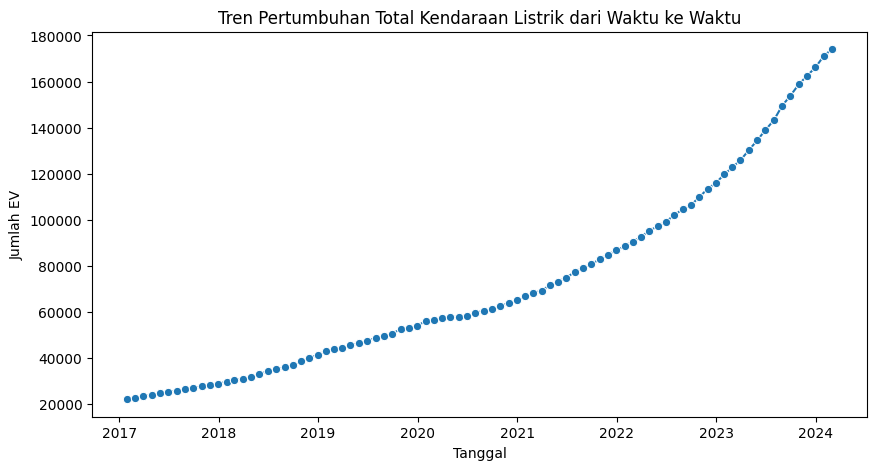

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


trend = df.groupby('Date')['Electric Vehicle (EV) Total'].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=trend, x='Date', y='Electric Vehicle (EV) Total', marker='o')
plt.title('Tren Pertumbuhan Total Kendaraan Listrik dari Waktu ke Waktu')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah EV')
plt.show()


/tmp/ipython-input-2291769920.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_county, x='Electric Vehicle (EV) Total', y='County', palette='viridis')


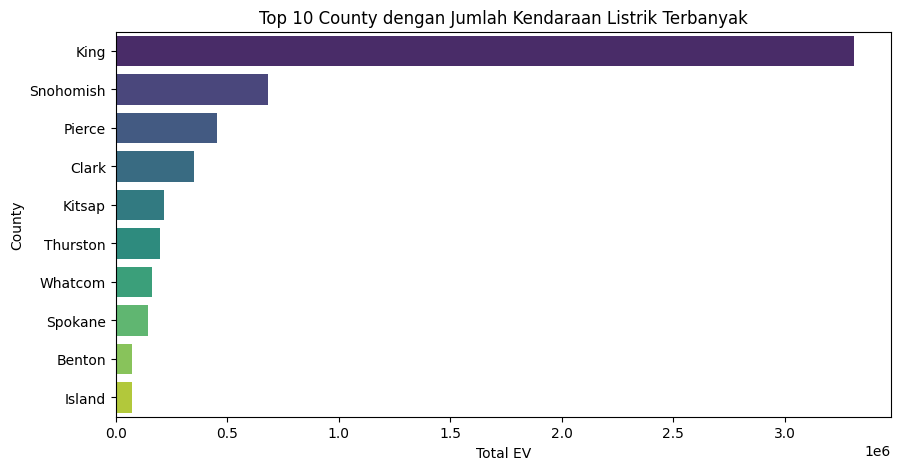

In [ ]:
top_county = (
    df.groupby('County')['Electric Vehicle (EV) Total']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

plt.figure(figsize=(10,5))
sns.barplot(data=top_county, x='Electric Vehicle (EV) Total', y='County', palette='viridis')
plt.title('Top 10 County dengan Jumlah Kendaraan Listrik Terbanyak')
plt.xlabel('Total EV')
plt.ylabel('County')
plt.show()


/tmp/ipython-input-2352243231.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_avg, x='Percent Electric Vehicles', y='State', palette='coolwarm')


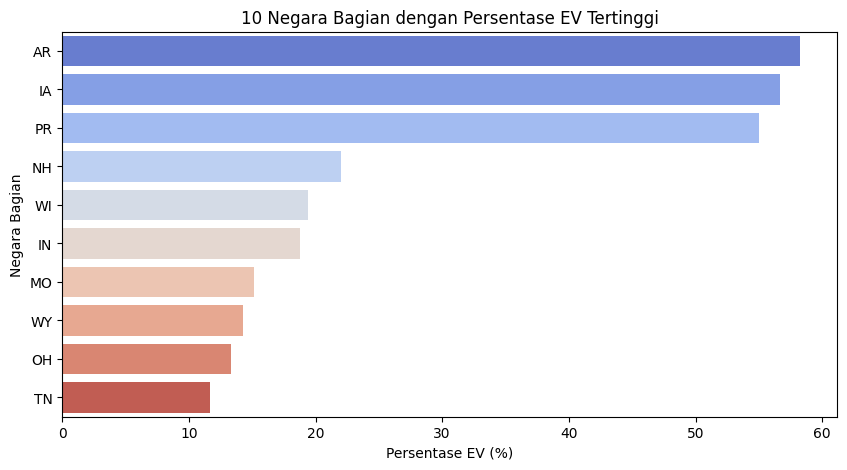

In [ ]:
state_avg = (
    df.groupby('State')['Percent Electric Vehicles']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

plt.figure(figsize=(10,5))
sns.barplot(data=state_avg, x='Percent Electric Vehicles', y='State', palette='coolwarm')
plt.title('10 Negara Bagian dengan Persentase EV Tertinggi')
plt.xlabel('Persentase EV (%)')
plt.ylabel('Negara Bagian')
plt.show()
